## MNIST Dataset을 활용하여 Deep Learning Model 구현

### Keras
* ONEIROS(Open-ended Neuro-Electronic Intelligent Robot Operating System) 프로젝트 일부
* 오네이로스 - 꿈을 의인화 시킨 신
* 꿈을 인간들에게 보내는 신(진실, 거짓의 문)
* 밤의 여신 닉스와 잠의 신(힙노스)의 자식들

### 케라스 딥러닝 모델 만들기
* 가. 데이터 셋 준비
    * 데이터 준비(훈련셋, 검증셋, 시험셋 등)
    * 딥러닝 모델의 학습 및 평가를 위한 데이터 형태 맞추기(포맷 변환)
* 나. 모델 구성
    * 모델(Sequential)을 생성 후, 레이어를 추가하여 구성
    * 복잡한 모델을 구성시에 Keras API를 사용
* 다. 모델 학습과정 설정하기(compile() - 학습에 대한 설정)
    * 학습에 대한 설정, 손실 함수 및 최적화 방법 정의
* 라. 모델 학습(fit() - 모델을 훈련셋으로 학습)
* 마. 학습과정 살펴보기(훈련셋, 검증셋의 손실 및 정확도 측정)
* 바. 모델 평가(evaluate()) - 준비된 시험셋으로 학습 모델 평가
* 사. 모델 사용하기(predict())

### 케라스의(Keras) 주요 특징 4가지
* 개발 및 유지 보수 : 프랑소와 쏠레(Francois Chollet) - 구글에 있음.(tf 2.0)
* 모듈화(Modularity) : 모듈은 독립적이고 최소한의 제약사항으로 연결
* 최소주의(Minimalism) : 각 모듈은 짧고 간결하다.
* 쉬운 확장성 : 새로운 클래스나 함수로 모듈을 아주 쉽게 추가
* 파이썬 기반 : 파이썬 코드로 모델들이 정의

### 데이터 셋 MNIST
* 6만개의 훈련 이미지
* 만개의 테스트 이미지
* 딥러닝계의 MNIST
* 1980년대 미국 국립표준 기술 연구소(National Institute of Standards and TEchnology, NIST)에서 수집한 데이터

### 클래스, 샘플, 레이블
* 분류의 문제의 범주를 클래스라하고,
* 데이터 포인터를 샘플(sample)이라고 한다.
* 특정 샘플의 클래스는 레이블(Label)이라고 한다.

In [43]:
import tensorflow as tf
import keras
import sys

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

In [4]:
print("tensorflow version :", tf.__version__)
print("keras version :", keras.__version__)
print("sys version :", sys.version)

tensorflow version : 2.6.1
keras version : 2.6.0
sys version : 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


### Dataset 불러오기

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train_n = x_train.copy()
y_train_n = y_train.copy()
x_test_n = x_test.copy()
y_test_n = y_test.copy()

### 데이터 크기
* 60000개의 train dataset, 10000개의 test dataset

In [8]:
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


### x_train 하나의 데이터 확인
* 60000장의 이미지(28, 28 숫자데이터)

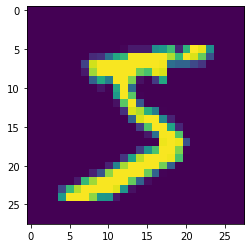

In [11]:
plt.imshow(x_train[0])

### 10개의 y_train data 확인

In [12]:
# y 레이블 데이터 0 ~ 10개 확인
print("label = {}".format(y_train[0:10]))

label = [5 0 4 1 9 2 1 3 1 4]


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


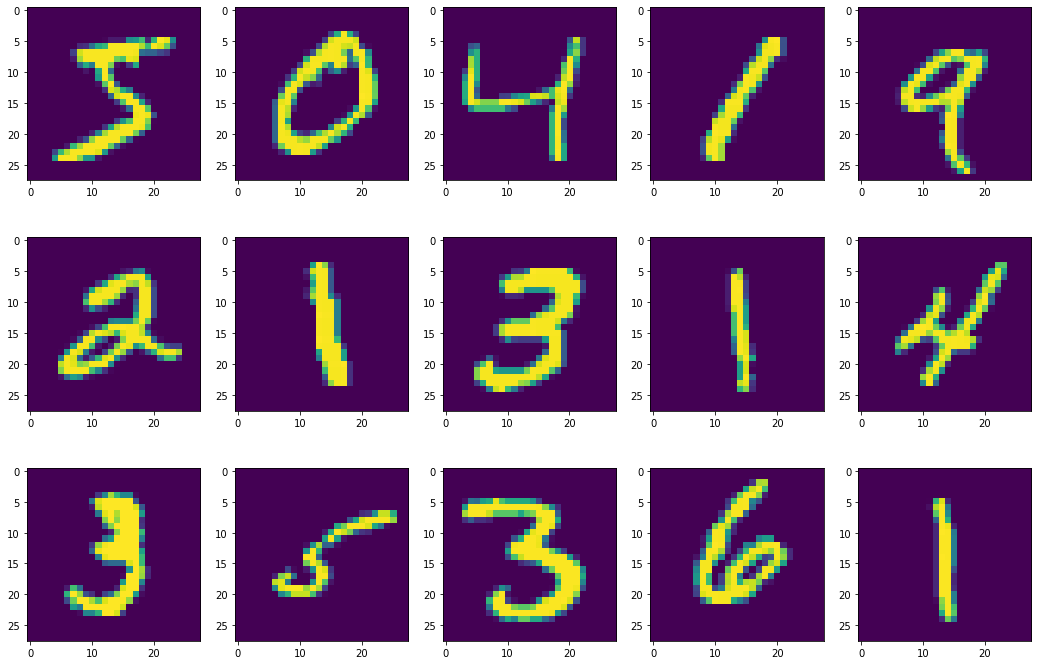

In [19]:
figure,axes = plt.subplots(nrows = 3, ncols = 5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

print("label = {}".format(y_train[0:15]))   # y 레이블 데이터 0~15개 확인

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].imshow(x_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(x_train[col + 1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(x_train[col + 2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(x_train[col + 3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(x_train[col + 4])# 4,9,14의 값을 갖는 위치 값 이미지 표시

### data shape 변경
* x_train shape 변경 60000, 28, 28  -> 60000, 784 (28*28)
* x_test shape 변경 10000, 28, 28  -> 10000, 784 (28*28)

* y_train shape 변경 60000,   -> 60000, 10 (28*28)
* y_test shape 변경 10000,   -> 10000, 10 (28*28)

In [29]:
print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)
print()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)

print("=" * 30)

print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

print(y_train[0:5])
print()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)
print(y_train[0:5])

x_train shape : (60000, 28, 28)
x_test shape : (10000, 28, 28)

x_train shape : (60000, 784)
x_test shape : (10000, 784)
y_train shape : (60000,)
y_test shape : (10000,)
[5 0 4 1 9]

y_train shape : (60000, 10)
y_test shape : (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [30]:
# 데이터 자료형 변경
# 01. 실수형 변경.
# 02. 값의 범위를 정규화(0 ~ 255) -> 0 ~ 1로 변경
print(x_train[0])

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [31]:
# 위 내용의 코드를 간략하게 만들 수 있음
# x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
# x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

### 모델 구성하기

In [33]:
model = Sequential()
model.add(Dense(units = 64, input_dim = 28 * 28, activation = "tanh")) # 입력층(28 * 28 = 784 노드), 은닉층(64 노드)
model.add(Dense(32))
model.add(Activation("tanh"))
model.add(Dense(32))
model.add(Activation("tanh")) # 한줄로 표현 가능 -> model.add(Dense(32, activation = "tanh"))
model.add(Dense(units = 10, activation = "softmax")) # 출력층(10 노드)

### 손실함수(loss function) or 목적함수(objective function)
* 신경망의 출력을 제어하기 위해 출력이 기대하는 것보다 얼마나 벗어났는지에 대해 측정하기
* 비용함수는 모든 훈련 데이터에 대한 손실 함수의 합을 나타내고 목적함수는 더 일반적인 용어로 최적화하기 위한 대상 함수를 의미한다.

### 모델 학습과정 설정하기
* model.compile
    * 손실 함수(loss function) : 훈련 데이터에서 신경망의 성능을 측정하는 방법. 네트워크가 옮은 방향으로 학습될 수 있도록 도와준다.
    * 옵티마이저(optimizer) : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘.
    * metrics : 훈련과 테스트 과정을 모니터링할 지표 : 정확도(정확히 분류된 이미지의 비율)만 고려
* categorical_crossentropy : 여러가지 오차를 구하는 함수 중의 하나
* sgd(Stochastic Gradient Descent) : 데이터 셋을 미니배치만큼 돌려서 찾아가는 방법
* accuracy : 정확도로 성능을 측정

In [34]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "sgd", metrics = ["accuracy"])

### 모델 학습시키기
* [모델명].fit(, , , )
* hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
    * x_train : 입력 데이터
    * y_train : 출력(예측) 데이터
    * epochs : 전체 데이터 몇번 돌리것인가?
    * batch_size : 몇개씩 데이터를 돌려볼 것인가?

In [35]:
hist = model.fit(x_train, y_train, epochs = 10, batch_size = 32)

2021-11-02 22:09:41.428237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 631us/step - loss: 0.7171 - accuracy: 0.8177
Epoch 2/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.3322 - accuracy: 0.9093
Epoch 3/10
1875/1875 [==============================] - 1s 600us/step - loss: 0.2660 - accuracy: 0.9245
Epoch 4/10
1875/1875 [==============================] - 1s 611us/step - loss: 0.2273 - accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.1987 - accuracy: 0.9438
Epoch 6/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.1770 - accuracy: 0.9500
Epoch 7/10
1875/1875 [==============================] - 1s 643us/step - loss: 0.1594 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.1450 - accuracy: 0.9585
Epoch 9/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.1330 - accuracy: 0.9622
Epoch 10/10
1875/1875 [==============================] - 1s 653u

### 학습과정 확인
* 각 epoch별 loss값과 acc값 확인
* 그래프로 확인

In [36]:
# 값 확인
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [37]:
# 10번의 epoch마다의 loss(손실)과 accuracy(정확도)의 값.
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[0.7170971632003784, 0.33223089575767517, 0.2659815549850464, 0.2272626757621765, 0.19870449602603912, 0.1769905537366867, 0.15937338769435883, 0.14502644538879395, 0.13298824429512024, 0.12280840426683426]
[0.8177000284194946, 0.9092666506767273, 0.9245166778564453, 0.9350166916847229, 0.9438166618347168, 0.9499666690826416, 0.9547833204269409, 0.9585333466529846, 0.962233304977417, 0.9643333554267883]


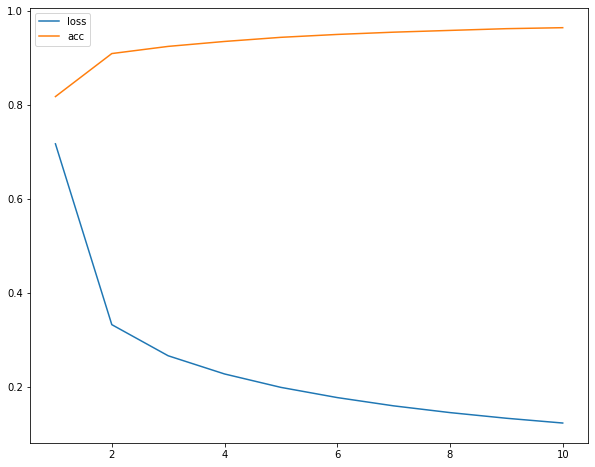

In [39]:
plt.figure(figsize = (10, 8),facecolor = 'white')
x_lim = range(1, 11)
plt.plot(x_lim, hist.history['loss'])
plt.plot(x_lim, hist.history['accuracy'])
plt.legend(['loss','acc'])

### 모델 평가
* test data를 활용하여 만들어진 모델 평가

In [40]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

print('## evaluation loss and_metrics ##')
print(loss_and_metrics)  # 최종 데이터 loss와 정확도(accuracy)

313/313 [==============================] - 0s 570us/step - loss: 0.1291 - accuracy: 0.9614
## evaluation loss and_metrics ##
[0.12913306057453156, 0.9613999724388123]


### 모델 사용하여 예측

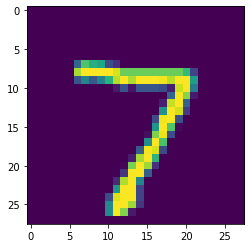

In [42]:
# x_test 하나의 데이터 확인
plt.imshow(x_test_n[0])

In [44]:
# np.set_printoptions(precision=3) 
# 좀 더 확인하기 쉽게 표시
np.set_printoptions(formatter = {'float_kind': lambda x: "{0:0.6f}".format(x)})

xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat) # 각 값의 확률을 표시
print(yhat.argmax(axis = 1))

## yhat ##
[[0.000109 0.000078 0.000537 0.002768 0.000015 0.000015 0.000000 0.995144
  0.000021 0.001314]]
[7]
